In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [2]:
df_sales = pd.read_csv('C:/Users/HP/GL_PRATIK/Capstone/dataset/train.csv')
df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_sales.shape

(550068, 12)

In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df_sales['User_ID'] = df_sales['User_ID'].astype('object')
df_sales['Occupation'] = df_sales['Occupation'].astype('object')
df_sales['Marital_Status'] = df_sales['Marital_Status'].astype('object')
df_sales['Product_Category_1'] = df_sales['Product_Category_1'].astype('object')
df_sales['Product_Category_2'] = df_sales['Product_Category_2'].astype('object')
df_sales['Product_Category_3'] = df_sales['Product_Category_3'].astype('object')

# Removing insignificant variables

In [6]:
df_sales = df_sales.drop(['User_ID','Product_ID'],axis=1)

In [7]:
from scipy.stats import f_oneway

In [8]:
gender_list =df_sales.groupby('Gender')['Purchase'].apply(list)
gender_list

Gender
F    [8370, 15200, 1422, 1057, 5378, 2079, 13055, 8...
M    [7969, 15227, 19215, 15854, 15686, 7871, 5254,...
Name: Purchase, dtype: object

In [9]:
f_oneway(*gender_list)

F_onewayResult(statistic=2010.4424717228965, pvalue=0.0)

In [10]:
## p value is zero i.e. we reject the null hypothesis, i.e. gender is significant variable

In [11]:
age_list = df_sales.groupby('Age')['Purchase'].apply(list)
f_oneway(*age_list)

F_onewayResult(statistic=40.57579909450407, pvalue=1.053563939251671e-49)

In [12]:
## Pvalue is less than 0.05, so age is also the significant variable

In [13]:
Occupation_list = df_sales.groupby('Occupation')['Purchase'].apply(list)
f_oneway(*Occupation_list)

F_onewayResult(statistic=98.47377546928169, pvalue=0.0)

In [14]:
## Pvalue is less than 0.05, so the occupation is also the significant feature

In [15]:
City_list = df_sales.groupby('City_Category')['Purchase'].apply(list)
f_oneway(*City_list)

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

In [16]:
## Pvalue is less than 0.05, so City Category is also significant feature

In [17]:
Stay_list = df_sales.groupby('Stay_In_Current_City_Years')['Purchase'].apply(list)
f_oneway(*Stay_list)

F_onewayResult(statistic=9.382655346642094, pvalue=1.4011435777855407e-07)

In [18]:
## Stay in current city years has pvalue less than 0.05, so it is significant

In [19]:
Marital_list = df_sales.groupby('Marital_Status')['Purchase'].apply(list)
f_oneway(*Marital_list)

F_onewayResult(statistic=0.11810893524268033, pvalue=0.7310947526475329)

In [20]:
## It has pvalue greater than 0.05. So it is not significant feature

In [21]:
Product_1_list = df_sales.groupby('Product_Category_1')['Purchase'].apply(list)
f_oneway(*Product_1_list)

F_onewayResult(statistic=50703.97442053588, pvalue=0.0)

In [22]:
## Pvalue is less than 0.05, So it is significant

In [23]:
Product_2_list = df_sales.groupby('Product_Category_2')['Purchase'].apply(list)
f_oneway(*Product_2_list)

F_onewayResult(statistic=3787.492550622429, pvalue=0.0)

In [24]:
## Pvalue is less than 0.05, So it is significant

In [25]:
Product_3_list = df_sales.groupby('Product_Category_3')['Purchase'].apply(list)
f_oneway(*Product_3_list)

F_onewayResult(statistic=674.4443183087945, pvalue=0.0)

In [26]:
## Pvalue is less than 0.05, So it is significant

# Outliers analysis and treatment 

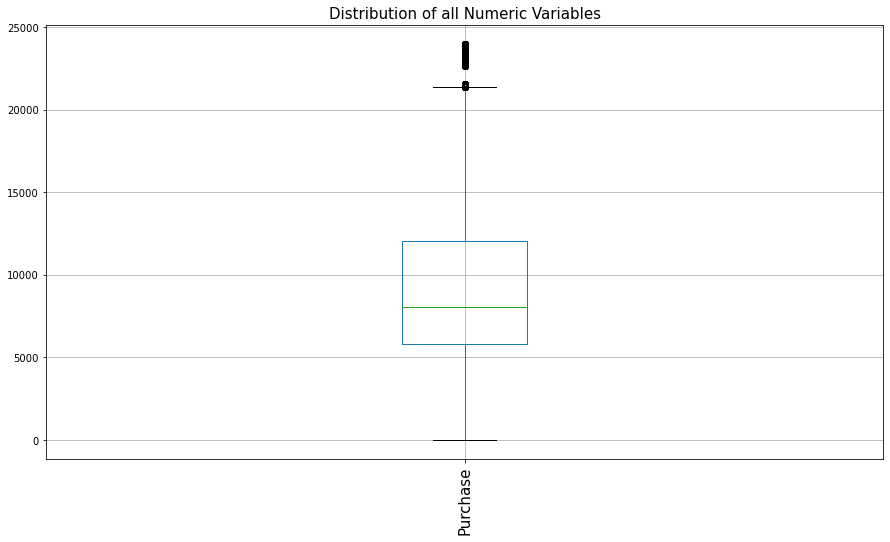

In [27]:

plt.figure(figsize = (15,8))


df_sales.boxplot()


plt.title('Distribution of all Numeric Variables', fontsize = 15)


plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [28]:
## As there is only one numerical column i.e. purchase which is the target variable 
## so the outlier can't be removed from this

# Missing value Treatment

In [29]:
df_sales.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.000000,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [30]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  object
 6   Product_Category_1          550068 non-null  object
 7   Product_Category_2          376430 non-null  object
 8   Product_Category_3          166821 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [31]:
df_sales[df_sales['Product_Category_1']==1].isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2             6598
Product_Category_3            49236
Purchase                          0
dtype: int64

In [32]:
df_sales[df_sales['Product_Category_1']==1]['Product_Category_2'].mode()

0   2.000000
dtype: object

In [33]:
df_sales[df_sales['Product_Category_1']==1]['Product_Category_3'].mode()

0   15.000000
dtype: object

In [34]:
df_sales.loc[(df_sales.Product_Category_1==1) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 2

In [35]:
df_sales[df_sales['Product_Category_1']==1].isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2                0
Product_Category_3            49236
Purchase                          0
dtype: int64

In [36]:
df_sales.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            167040
Product_Category_3            383247
Purchase                           0
dtype: int64

In [37]:
df_sales.loc[(df_sales.Product_Category_1==1) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 15 

In [38]:
df_sales[df_sales['Product_Category_1']==1].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [39]:
df_sales.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            167040
Product_Category_3            334011
Purchase                           0
dtype: int64

In [40]:
## Product Category_1 == 2

In [41]:
df_sales[df_sales['Product_Category_1']==2].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2             930
Product_Category_3            7555
Purchase                         0
dtype: int64

In [42]:
df_sales[df_sales['Product_Category_1']==2]['Product_Category_2'].mode()

0   4.000000
dtype: object

In [43]:
df_sales[df_sales['Product_Category_1']==2]['Product_Category_3'].mode()

0   15.000000
dtype: object

In [44]:
df_sales.loc[(df_sales.Product_Category_1==2) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 4

In [45]:
df_sales.loc[(df_sales.Product_Category_1==2) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 15

In [46]:
df_sales[df_sales['Product_Category_1']==2].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [47]:
df_sales.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166110
Product_Category_3            326456
Purchase                           0
dtype: int64

In [48]:
df_sales[df_sales['Product_Category_1']==3].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2             239
Product_Category_3            7751
Purchase                         0
dtype: int64

In [49]:
df_sales[df_sales['Product_Category_1']==3]['Product_Category_2'].mode()

0   4.000000
dtype: object

In [50]:
df_sales[df_sales['Product_Category_1']==3]['Product_Category_3'].mode()

0   5.000000
dtype: object

In [51]:
df_sales.loc[(df_sales.Product_Category_1==3) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 4
df_sales.loc[(df_sales.Product_Category_1==3) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 5

In [52]:
df_sales[df_sales['Product_Category_1']==3].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [53]:
df_sales[df_sales['Product_Category_1']==4].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2             143
Product_Category_3            6404
Purchase                         0
dtype: int64

In [54]:
df_sales[df_sales['Product_Category_1']==4]['Product_Category_2'].mode()

0   5.000000
dtype: object

In [55]:
df_sales[df_sales['Product_Category_1']==4]['Product_Category_3'].mode()

0   9.000000
dtype: object

In [56]:
df_sales.loc[(df_sales.Product_Category_1==4) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 5
df_sales.loc[(df_sales.Product_Category_1==4) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 9

In [57]:
df_sales[df_sales['Product_Category_1']==4].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [58]:
df_sales[df_sales['Product_Category_1']==5].isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             63700
Product_Category_3            131922
Purchase                           0
dtype: int64

In [59]:
df_sales[df_sales['Product_Category_1']==5]['Product_Category_2'].mode()

0   8.000000
dtype: object

In [60]:
df_sales[df_sales['Product_Category_1']==5]['Product_Category_3'].mode()

0   14.000000
dtype: object

In [61]:
df_sales.loc[(df_sales.Product_Category_1==5) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 8
df_sales.loc[(df_sales.Product_Category_1==5) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 14

In [62]:
df_sales[df_sales['Product_Category_1']==5].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [63]:
df_sales[df_sales['Product_Category_1']==6].isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2              993
Product_Category_3            12068
Purchase                          0
dtype: int64

In [64]:
df_sales[df_sales['Product_Category_1']==6]['Product_Category_2'].mode()

0   8.000000
dtype: object

In [65]:
df_sales[df_sales['Product_Category_1']==6]['Product_Category_3'].mode()

0   16.000000
dtype: object

In [66]:
df_sales.loc[(df_sales.Product_Category_1==6) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 8
df_sales.loc[(df_sales.Product_Category_1==6) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 16

In [67]:
df_sales[df_sales['Product_Category_1']==6].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [68]:
df_sales[df_sales['Product_Category_1']==7].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3421
Product_Category_3            3721
Purchase                         0
dtype: int64

In [69]:
df_sales[df_sales['Product_Category_1']==7]['Product_Category_2'].mode()

0   12.000000
dtype: object

In [70]:
df_sales[df_sales['Product_Category_1']==7]['Product_Category_3'].mode()

Series([], dtype: object)

In [71]:
df_sales.loc[(df_sales.Product_Category_1==7) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 12
df_sales.loc[(df_sales.Product_Category_1==7) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [72]:
df_sales[df_sales['Product_Category_1']==7].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [73]:
df_sales[df_sales['Product_Category_1']==8].isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             60760
Product_Category_3            104857
Purchase                           0
dtype: int64

In [74]:
df_sales[df_sales['Product_Category_1']==8]['Product_Category_2'].mode()

0   14.000000
dtype: object

In [75]:
df_sales[df_sales['Product_Category_1']==8]['Product_Category_3'].mode()

0   17.000000
dtype: object

In [76]:
df_sales.loc[(df_sales.Product_Category_1==8) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 14
df_sales.loc[(df_sales.Product_Category_1==8) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 17

In [77]:
df_sales[df_sales['Product_Category_1']==8].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [78]:
df_sales[df_sales['Product_Category_1']==9].isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              1
Product_Category_3            410
Purchase                        0
dtype: int64

In [79]:
df_sales[df_sales['Product_Category_1']==9]['Product_Category_2'].mode()

0   15.000000
dtype: object

In [80]:
df_sales[df_sales['Product_Category_1']==9]['Product_Category_3'].mode()

Series([], dtype: object)

In [81]:
df_sales.loc[(df_sales.Product_Category_1==9) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 15
df_sales.loc[(df_sales.Product_Category_1==9) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [82]:
df_sales[df_sales['Product_Category_1']==9].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [83]:
df_sales[df_sales['Product_Category_1']==10].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2             456
Product_Category_3            3370
Purchase                         0
dtype: int64

In [84]:
df_sales[df_sales['Product_Category_1']==10]['Product_Category_2'].mode()

0   13.000000
dtype: object

In [85]:
df_sales[df_sales['Product_Category_1']==10]['Product_Category_3'].mode()

0   16.000000
dtype: object

In [86]:
df_sales.loc[(df_sales.Product_Category_1==10) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 13
df_sales.loc[(df_sales.Product_Category_1==10) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 16

In [87]:
df_sales[df_sales['Product_Category_1']==10].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [88]:
df_sales[df_sales['Product_Category_1']==11].isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            12371
Product_Category_3            22326
Purchase                          0
dtype: int64

In [89]:
df_sales[df_sales['Product_Category_1']==11]['Product_Category_2'].mode()

0   15.000000
dtype: object

In [90]:
df_sales[df_sales['Product_Category_1']==11]['Product_Category_3'].mode()

0   16.000000
dtype: object

In [91]:
df_sales.loc[(df_sales.Product_Category_1==11) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 15
df_sales.loc[(df_sales.Product_Category_1==11) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 16

In [92]:
df_sales[df_sales['Product_Category_1']==11].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [93]:
df_sales[df_sales['Product_Category_1']==12].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1777
Product_Category_3            3788
Purchase                         0
dtype: int64

In [94]:
df_sales[df_sales['Product_Category_1']==12]['Product_Category_2'].mode()

0   14.000000
dtype: object

In [95]:
df_sales[df_sales['Product_Category_1']==12]['Product_Category_3'].mode()

0   17.000000
dtype: object

In [96]:
df_sales.loc[(df_sales.Product_Category_1==12) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 14
df_sales.loc[(df_sales.Product_Category_1==12) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 17

In [97]:
df_sales[df_sales['Product_Category_1']==12].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [98]:
df_sales[df_sales['Product_Category_1']==13].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2             626
Product_Category_3            4493
Purchase                         0
dtype: int64

In [99]:
df_sales[df_sales['Product_Category_1']==13]['Product_Category_2'].mode()

0   16.000000
dtype: object

In [100]:
df_sales[df_sales['Product_Category_1']==13]['Product_Category_3'].mode()

0   16.000000
dtype: object

In [101]:
df_sales.loc[(df_sales.Product_Category_1==13) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 16
df_sales.loc[(df_sales.Product_Category_1==13) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 16

In [102]:
df_sales[df_sales['Product_Category_1']==13].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [103]:
df_sales[df_sales['Product_Category_1']==14].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1103
Product_Category_3            1523
Purchase                         0
dtype: int64

In [104]:
df_sales[df_sales['Product_Category_1']==14]['Product_Category_2'].mode()

0   16.000000
dtype: object

In [105]:
df_sales[df_sales['Product_Category_1']==14]['Product_Category_3'].mode()

Series([], dtype: object)

In [106]:
df_sales.loc[(df_sales.Product_Category_1==14) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 16
df_sales.loc[(df_sales.Product_Category_1==14) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [107]:
df_sales[df_sales['Product_Category_1']==14].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [108]:
df_sales[df_sales['Product_Category_1']==15].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            2836
Product_Category_3            6139
Purchase                         0
dtype: int64

In [109]:
df_sales[df_sales['Product_Category_1']==15]['Product_Category_2'].mode()

0   16.000000
dtype: object

In [110]:
df_sales[df_sales['Product_Category_1']==15]['Product_Category_3'].mode()

0   17.000000
dtype: object

In [111]:
df_sales.loc[(df_sales.Product_Category_1==15) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 16
df_sales.loc[(df_sales.Product_Category_1==15) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 17

In [112]:
df_sales[df_sales['Product_Category_1']==15].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [113]:
df_sales[df_sales['Product_Category_1']==16].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            9828
Product_Category_3            9828
Purchase                         0
dtype: int64

In [114]:
df_sales[df_sales['Product_Category_1']==16]['Product_Category_3'].mode()

Series([], dtype: object)

In [115]:
df_sales[df_sales['Product_Category_1']==16]['Product_Category_2'].mode()

Series([], dtype: object)

In [116]:
df_sales.loc[(df_sales.Product_Category_1==16) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [117]:
df_sales.loc[(df_sales.Product_Category_1==16) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 0

In [118]:
df_sales[df_sales['Product_Category_1']==16].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [119]:
df_sales[df_sales['Product_Category_1']==17].isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            578
Product_Category_3            578
Purchase                        0
dtype: int64

In [120]:
df_sales[df_sales['Product_Category_1']==17]['Product_Category_3'].mode()

Series([], dtype: object)

In [121]:
df_sales[df_sales['Product_Category_1']==17]['Product_Category_2'].mode()

Series([], dtype: object)

In [122]:
df_sales.loc[(df_sales.Product_Category_1==17) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [123]:
df_sales.loc[(df_sales.Product_Category_1==17) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 0

In [124]:
df_sales[df_sales['Product_Category_1']==17].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [125]:
df_sales[df_sales['Product_Category_1']==18].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3125
Product_Category_3            3125
Purchase                         0
dtype: int64

In [126]:
df_sales[df_sales['Product_Category_1']==18]['Product_Category_3'].mode()

Series([], dtype: object)

In [127]:
df_sales[df_sales['Product_Category_1']==18]['Product_Category_2'].mode()

Series([], dtype: object)

In [128]:
df_sales.loc[(df_sales.Product_Category_1==18) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [129]:
df_sales.loc[(df_sales.Product_Category_1==18) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 0

In [130]:
df_sales[df_sales['Product_Category_1']==18].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [131]:
df_sales[df_sales['Product_Category_1']==19].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1603
Product_Category_3            1603
Purchase                         0
dtype: int64

In [132]:
df_sales[df_sales['Product_Category_1']==19]['Product_Category_3'].mode()

Series([], dtype: object)

In [133]:
df_sales[df_sales['Product_Category_1']==19]['Product_Category_2'].mode()

Series([], dtype: object)

In [134]:
df_sales.loc[(df_sales.Product_Category_1==19) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [135]:
df_sales.loc[(df_sales.Product_Category_1==19) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 0

In [136]:
df_sales[df_sales['Product_Category_1']==19].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [137]:
df_sales[df_sales['Product_Category_1']==20].isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            2550
Product_Category_3            2550
Purchase                         0
dtype: int64

In [138]:
df_sales[df_sales['Product_Category_1']==20]['Product_Category_3'].mode()

Series([], dtype: object)

In [139]:
df_sales[df_sales['Product_Category_1']==20]['Product_Category_2'].mode()

Series([], dtype: object)

In [140]:
df_sales.loc[(df_sales.Product_Category_1==20) & (df_sales.Product_Category_3.isna()), 'Product_Category_3'] = 0

In [141]:
df_sales.loc[(df_sales.Product_Category_1==20) & (df_sales.Product_Category_2.isna()), 'Product_Category_2'] = 0

In [142]:
df_sales[df_sales['Product_Category_1']==20].isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [143]:
df_sales.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [144]:
### Label Encoding

In [145]:
df_sales.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,4,5,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,14,17,1422
3,F,0-17,10,A,2,0,12,14.000000,17,1057
4,M,55+,16,C,4+,0,8,14,17,7969


In [146]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [147]:
df_sales['Gender'] = lr.fit_transform(df_sales['Gender'])
df_sales['Age'] = lr.fit_transform(df_sales['Age'])
df_sales['Stay_In_Current_City_Years'] = lr.fit_transform(df_sales['Stay_In_Current_City_Years'])
df_sales['City_Category'] = lr.fit_transform(df_sales['City_Category'])

In [148]:
df_sales.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,4,5,8370
1,0,0,10,0,2,0,1,6.000000,14.000000,15200
2,0,0,10,0,2,0,12,14,17,1422
3,0,0,10,0,2,0,12,14.000000,17,1057
4,1,6,16,2,4,0,8,14,17,7969


In [149]:
## RFE selection

In [150]:
from sklearn.feature_selection import RFE

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [152]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_sales.drop('Purchase', axis = 1)
 
# consider the dependent variable
y = df_sales['Purchase']

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, step = 1)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)



# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Gender', 'City_Category', 'Product_Category_1', 'Product_Category_3'], dtype='object')


In [153]:
feat_index

Gender                        1
Age                           2
Occupation                    5
City_Category                 1
Stay_In_Current_City_Years    4
Marital_Status                3
Product_Category_1            1
Product_Category_2            6
Product_Category_3            1
dtype: int32

In [154]:
## This are the most significant features in the dataset using RFE

In [155]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [156]:
## Forward Selection

In [157]:
df_sales_cons = df_sales.copy()

In [158]:
X = df_sales_cons.drop('Purchase',1)

y = df_sales_cons['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [159]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train) ## it will fit the model to the selected features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s finished

[2022-02-26 16:17:57] Features: 1/9 -- score: 0.11735115137547544[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.5s finished

[2022-02-26 16:18:00] Features: 2/9 -- score: 0.13685518544978073[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.0s finished

[2022-02-26 16:18:06] Features: 3/9 -- score: 0.1398413959164665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [160]:
sfs_forward.k_feature_names_

('Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3')

In [161]:
## Backward Elimination

In [162]:
linreg = LinearRegression()

linreg_backward = sfs(estimator = linreg, k_features = 'best', forward = False,
                     verbose = 2, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.6s finished

[2022-02-26 16:18:51] Features: 8/1 -- score: 0.14307971171611836[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.9s finished

[2022-02-26 16:19:03] Features: 7/1 -- score: 0.1430777248403141[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.6s finished

[2022-02-26 16:19:11] Features: 6/1 -- score: 0.14304452845785143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [163]:
sfs_backward.k_feature_names_

('Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3')

In [164]:
## This are the best significant feature to be selected for model building

In [165]:
## Linear Regression Model

In [166]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  int32 
 1   Age                         550068 non-null  int32 
 2   Occupation                  550068 non-null  object
 3   City_Category               550068 non-null  int32 
 4   Stay_In_Current_City_Years  550068 non-null  int32 
 5   Marital_Status              550068 non-null  object
 6   Product_Category_1          550068 non-null  object
 7   Product_Category_2          550068 non-null  object
 8   Product_Category_3          550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int32(4), int64(1), object(5)
memory usage: 33.6+ MB


In [167]:
df_sales['Occupation'] = df_sales['Occupation'].astype('int64')
df_sales['Marital_Status'] = df_sales['Marital_Status'].astype('int64')
df_sales['Product_Category_1'] = df_sales['Product_Category_1'].astype('int64')
df_sales['Product_Category_2'] = df_sales['Product_Category_2'].astype('int64')
df_sales['Product_Category_3'] = df_sales['Product_Category_3'].astype('int64')

In [168]:
X = df_sales.drop('Purchase', axis = 1)
 
# consider the dependent variable
y = df_sales['Purchase']

X = sm.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=20,test_size=0.3)

In [169]:
MLR_model = sm.OLS(y_train,X_train).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     7178.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:19:27   Log-Likelihood:            -3.7979e+06
No. Observations:              385047   AIC:                         7.596e+06
Df Residuals:                  385037   BIC:                         7.596e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [170]:
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print('RMSE for train dataset is : ',rmse_train)

RMSE for train dataset is :  4649.004


In [171]:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test,test_pred)
rmse_test = round(np.sqrt(mse_test),4)
print('RMSE for test dataset is : ',rmse_test)

RMSE for test dataset is :  4644.2447


In [172]:
from sklearn.model_selection import cross_val_score

In [174]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [175]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [176]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.14307922 0.14662074 0.14221384 0.14563317 0.14266136]

Minimum score obtained:  0.1422
Maximum score obtained:  0.1466
Average score obtained:  0.144


In [177]:
X_1 = df_sales[['Gender', 'Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2',
                'Product_Category_3']]
y_1 = df_sales['Purchase']


In [178]:
X_1_train,X_1_test,y_1_train,y_1_test = train_test_split(X_1,y_1,random_state=10,test_size=0.3)

In [179]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

regressor = DecisionTreeRegressor(random_state = 0)  

linreg_with_dst = regressor.fit(X_1_train, y_1_train)

y_pred2 = linreg_with_dst.predict(X_1_test)

print('RMSE on train dataset :', np.sqrt(mean_squared_error(y_1_test,y_pred2)))

print('RMSE on test set:', np.sqrt(mean_squared_error(y_1_test,y_pred2)))

RMSE on train dataset : 3157.4919953814383
RMSE on test set: 3157.4919953814383


In [180]:
train_pred_1 = linreg_with_dst.predict(X_1_train)
mse_train_1 = mean_squared_error(y_1_train, train_pred_1)
rmse_train_1 = round(np.sqrt(mse_train_1), 4)
print('RMSE for train dataset is : ',rmse_train_1)

test_pred_1 = linreg_with_dst.predict(X_1_test)
mse_test_1 = mean_squared_error(y_1_test, test_pred_1)
rmse_test_1 = round(np.sqrt(mse_test_1), 4)
print('RMSE for test dataset is : ',rmse_test_1)


RMSE for train dataset is :  2573.3199
RMSE for test dataset is :  3157.492


In [181]:
linreg_with_dst.score(X_1_train, y_1_train)

0.7376071927209895

In [182]:
linreg_with_dst.feature_importances_

array([0.00965087, 0.02621622, 0.04307799, 0.0118331 , 0.01153201,
       0.8625401 , 0.01952566, 0.01562405])